# Sentiment Classification on Product Reviews

Programming Language: R 3.6 in Jupyter Notebook

Project Members:
* Akshay Sapra
* Aniruddha Indurkar
* Nikita Bhargav

Python Libraries used:
- pandas
- nltk
- sklearn
- matplotlib
- seaborn


## Introduction

This Notebook is about sentimental analysis of Yelp data(reviews) where we have predicted sentimental polarity (strong negative, weak negative, neutral, weak positive, and strong positive) of reviews using TF-IDF feature selection and multinomial logistic classifier. This notebook also calculates the accuracy provided by logistic model.

We are provided with 3 text files:
* train_data.csv consist of all the reviews for training our model.
* train_label.csv consist of all the labels for training our model.
* test_data.csv consist of all the test data used for testing the model we learned from training data with a missing labels.

Training data consists of 650k rows with train_data.csv(trn_id and text) and train_label.csv(trn_id,labels) as columns.
Test data consists of 50k rows with test_data.csv(text) column.

This notebook is divided into several tasks:

- The first section of the notebook shows pre-processing and feature extraction.
- The second section shows training our model and calculating accuracy.
- The third section shows testing our model.


# Libraries Used

In [ ]:
import pandas as pd  
from nltk.stem import WordNetLemmatizer #lemmetizing of tokens
from nltk.corpus import wordnet 
from nltk import word_tokenize
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report 
import matplotlib.pyplot as plt 
import seaborn as sns  

# Reading the CSV files

Loading dataset into traindata from train_data file and trainlabel from train_label

In [6]:
traindata=pd.read_csv('./train_data.csv', encoding='ISO-8859-1') # Loading Training review data
trainlabel=pd.read_csv('./train_label.csv', encoding='ISO-8859-1') # Loading Training label data

In [ ]:
## Slice of lower sample
# traindata=traindata.iloc[0:20000,:].copy()

Merging the training dataset set

In [8]:
review_data = pd.merge(traindata,trainlabel, on=['trn_id']) # merging training data with training label data

Calculating length of each review for analysing distribution of each label

In [7]:
review_data['textlength'] = review_data['text'].apply(len) # to calculate length of each review

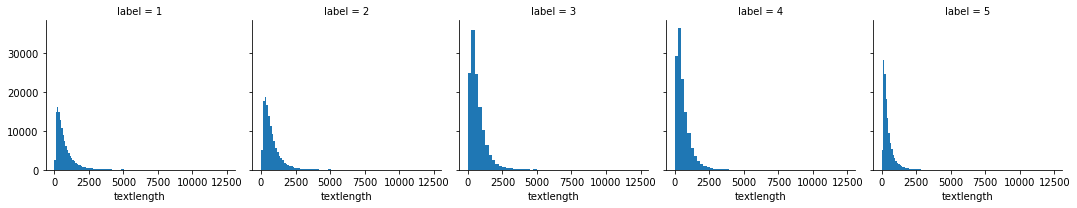

In [9]:
g = sns.FacetGrid(data=review_data, col='label')
g.map(plt.hist, 'textlength', bins=50)

Distribution of review length is similar for all 5 labels. label 3,4 and 5 are seems to be more left skewed. This may show some effect later. 

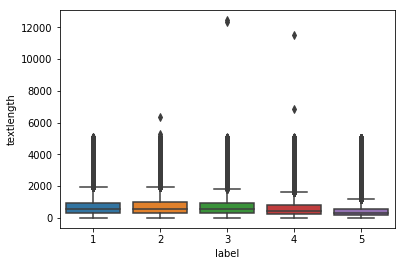

In [18]:
sns.boxplot(x='label', y='textlength', data=review_data)

There are some outliers as well in label 2, 3 and 4 

##  Pre Processing and TF-IDF Feature Extraction

For pre processing we have perform:
* Word tokenization using "(?u)\\b\\w\\w+\\b" pattern
* Removing tokens with document frequency less than equal to 3
* Considering unigrams, bigrams and trigrams tokens
* Lemmatization for obtaing root words


Feature Extraction using TF-IDF Vector 

In [2]:
# Creating TF-IDF Vector

class LemmaTokenizer(object):  # class to lemmatize the tokens
    def __init__(self):
        self.wnl=WordNetLemmatizer()
    def __call__(self,doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]


trainDocs=traindata['text'].tolist() # converting string to list

vectorizer=TfidfVectorizer(analyzer='word',input='content',
                           token_pattern='(?u)\\b\\w\\w+\\b',  # tokenizing pattern
                           min_df=3,                           # Removing rare tokens
                           ngram_range=(1,3),                  # Considering unigrams, bigrams and trigrams
                           max_features=4930398,
                           max_df=.99,                         #Context independent stop words removal
                           tokenizer=LemmaTokenizer())         # calling lemmatizing function


x_train=vectorizer.fit_transform(trainDocs) # Creating TF-IDF sparse matrix

## Logistic Model Training and validation

Spliting the dataset into traning data(90%) and validation data/test data(10%)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x_train, training_label['label'],test_size=0.10)

Using Multiclass logistic model for predicting categorical response as 5 different labels{1,2,3,4,5}.

Creating logistic model with tuned parameters
 

In [7]:
clf = LogisticRegression(random_state=1, solver='liblinear', multi_class='ovr').fit(X_train, y_train)
pred=clf.predict(X_test) # Predicting labels for test data
print(confusion_matrix(y_test, pred)) # confusion matrix for predicted data
print('\n')
print(classification_report(y_test, pred))

[[10390  2084   235    39    70]
 [ 2978  7305  2352   251   134]
 [  643  2458  7265  2386   383]
 [  156   288  1938  7587  3064]
 [  123    55   198  2539 10079]]


              precision    recall  f1-score   support

           1       0.73      0.81      0.77     12818
           2       0.60      0.56      0.58     13020
           3       0.61      0.55      0.58     13135
           4       0.59      0.58      0.59     13033
           5       0.73      0.78      0.75     12994

   micro avg       0.66      0.66      0.66     65000
   macro avg       0.65      0.66      0.65     65000
weighted avg       0.65      0.66      0.65     65000



Solver set as liblinear supports both L1 and L2 regularization.
Multiclass set as ovr shows that model is using one vs rest classification.

Classification report provides a matrix consist of 4 columns:
Precision - That represents measure of accuracy for all the labels
recall - shows measure of sensitivityfor all the labels

F1 Score weighted average of precision and recall
F1 score is calculated using following formula:
F1 Score  = 2*(R*P)/(R+P)


# Calculating Accuracy

Calculating accuracy for 90% train data and 10% test data

In [8]:
print(metrics.accuracy_score( y_test,pred))

0.6557846153846154


This shows that accuracy for TF_IDF vector using multiclass logistic model is 65.59%

## Training the complete Model

In [17]:
class LemmaTokenizer(object): # class to lemmatize the tokens
    def __init__(self):
        self.wnl= WordNetLemmatizer()
    def __call__(self,doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

vectorizer=TfidfVectorizer(analyzer='word',input='content',
                           token_pattern='(?u)\\b\\w\\w+\\b',  # tokenizing pattern
                           min_df=3,                           # Removing rare tokens
                           ngram_range=(1,3),                  # Considering unigrams, bigrams and trigrams
                           max_features=4930398,
                           max_df=.99,                         #Context independent stop words removal
                           tokenizer=LemmaTokenizer())         # calling lemmatizing function

x_train=vectorizer.fit_transform(trainDocs) # Creating TF-IDF sparse matrix

## Testing the model

In [ ]:
testdata=pd.read_csv('./test_data.csv', encoding='ISO-8859-1') # fetching test data
testDocs=testdata['text'].tolist()        # converting string to list
real_test =vectorizer.transform(testDocs) # Transforming Test Data according to Train Data TF-IDF sparse matrix


## Fitting Logistic Model

In [26]:
# training over complete model
clf = LogisticRegression(random_state=1, solver='liblinear', multi_class='ovr').fit(x_train, training_label['label'])


Solver set as liblinear supports both L1 and L2 regularization.
Multiclass set as ovr shows that model is using one vs rest classification.

## Predicting the labels

In [27]:
pred_test=clf.predict(real_test)

Appending predicted labels to test dataframe.

In [28]:
testdata['label']=pred_test
testdata.head()
# pred_test

,test_id,text,label
0,test_1,trying to have a nice quiet dinner. the annou...,2
1,test_2,Been getting food to go from here for over 3yr...,4
2,test_3,Ugh. I've had to eat here a couple of times be...,2
3,test_4,The people here are so nice! I ordered on eat ...,5
4,test_5,Heard alot of good things about this place and...,4


## Writing Labels Into CSV File

In [29]:
testdata[["test_id","label"]].to_csv("predict_label.csv",sep=",",index=False)

The accuracy for the whole logistic model for test data is 65.826%

## Conclusion

For the sentimental analysis it can be observed that Logistic model with TF-IDF vectors predicts sentimental lables with highest accuracy of 65.82%. 